<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**22.4: Numerical Error and Instability**

<ipython-input-6-4351761e4d75>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  difference[i] = gensol(t, 2,0.2)[i]-uEu[i]


Text(0, 0.5, 'Difference')

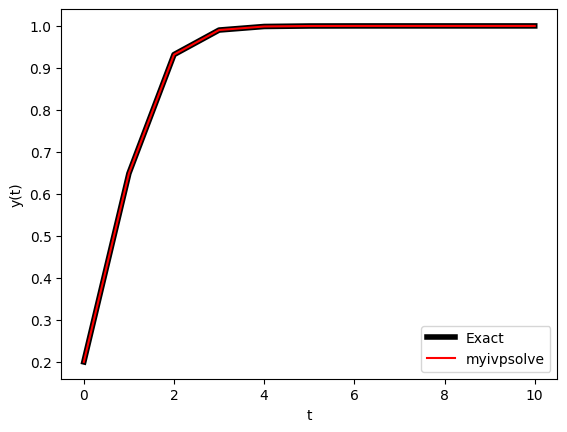

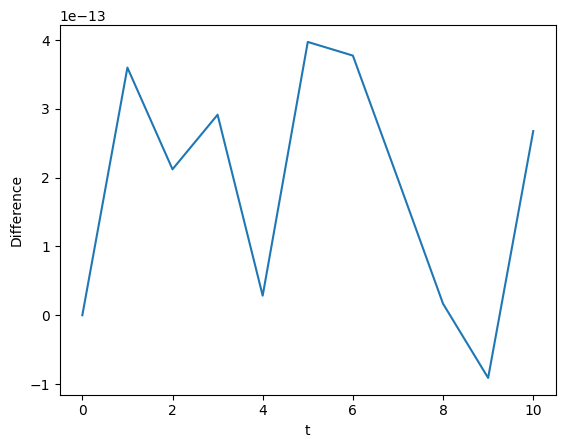

In [ ]:
#here is an example of error between exact solution and scipy.integrate.solve_ivp

import numpy as np
import matplotlib.pyplot as plt
import scipy
import tqdm

def myivpsolve(f,tspan,u0,N,params,rtol=1e-12,atol=1e-12):
  R = scipy.integrate.solve_ivp(
    f,
    tspan,
    np.array(u0),
    args=[params],
    method='RK45',
    t_eval=np.linspace(*tspan,N+1),
    rtol=rtol,
    atol=atol,
  )
  return R.t,R.y.T

def gensol(t,a,y0):
  return (y0*np.exp(a*t))/((1-y0)+y0*np.exp(a*t))

t = np.linspace(0,10,11)
plt.plot(t,gensol(t, 2,0.2),'k',linewidth = 4) #exact solution
plt.xlabel('t')
plt.ylabel('y(t)')

def logistic_rhs(t,u,*args):
  return np.array(args)*u*(1-u)
A  = np.array([2])
u0 = 0.2*np.ones(len(A))
ts = [0,10]
N = 10
t,uEu = myivpsolve(logistic_rhs,ts,u0,N,A)
plt.plot(t,uEu,'r',linewidth =1.5)
plt.legend(['Exact','myivpsolve'])
plt.figure()
difference = np.zeros((len(t)))
for i in range(len(gensol(t, 2,0.2))):
  difference[i] = gensol(t, 2,0.2)[i]-uEu[i]
plt.plot(t,difference)
plt.xlabel('t')
plt.ylabel('Difference')

[1.]
[2]


100%|██████████| 10/10 [00:00<00:00, 7704.45it/s]


[1.]
3


100%|██████████| 10/10 [00:00<00:00, 6740.00it/s]


[1.]
4


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-8-9f8586fd6172>:18: RuntimeWarning: overflow encountered in multiply
  return np.array(args)*u*(1-u)
100%|██████████| 10/10 [00:00<00:00, 16206.74it/s]


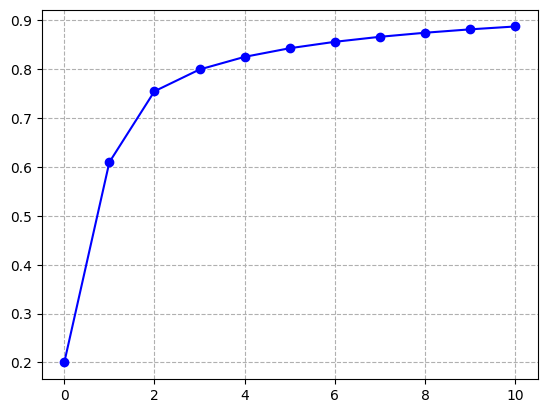

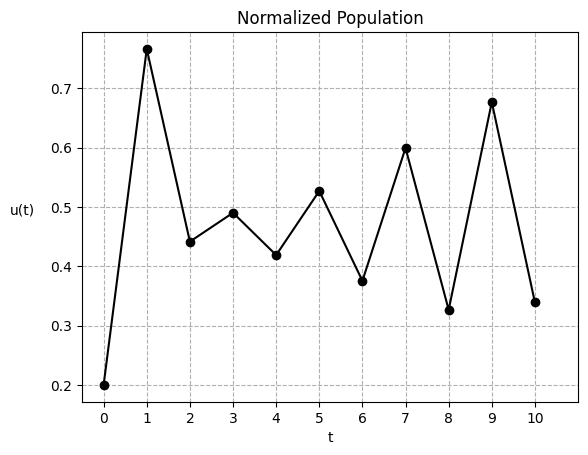

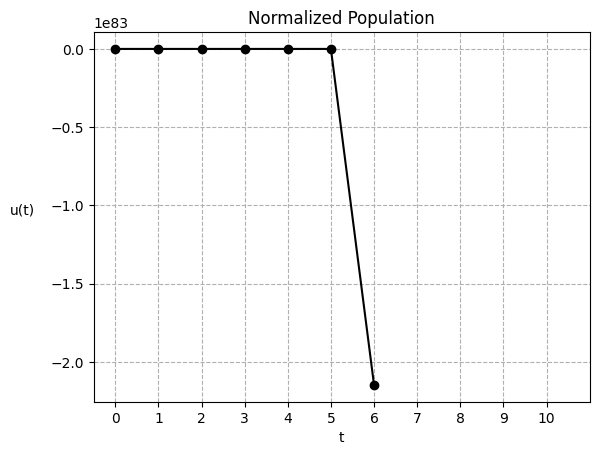

In [ ]:
#here is an example of increasing instability using improved euler

def myImprovedEuler(f,tspan,u0,N,params):
  h = np.diff(tspan) / N     # step size, (b-a)/N; N=num. of intervals
  print(h)
  print(params)
  t = np.linspace(*tspan,N+1) # t = [a,b] with N+1 points
  u = np.zeros((len(t),*np.array(u0).shape)) # initialize state object
  u1 = np.zeros((len(t),*np.array(u0).shape))
  u[0] = np.array(u0) # initial condition (casting in case u0 is scalar)
  for k in tqdm.trange(N): # extrapolate with progress bar
    f1     = f(t[k],u[k],params)
    f2     = f(t[k]+h,u[k]+h*f1,params)
    u[k+1] = u[k] + (h/2.0) * (f1+f2)
  return t,u

def logistic_rhs(t,u,*args):
  return np.array(args)*u*(1-u)
A  = np.array([2])
u0 = 0.2*np.ones(len(A))
ts = [0,10]
N = 10

plt.grid(linestyle='--')

t,uEu = myImprovedEuler(logistic_rhs,ts,u0,N,A)
plt.plot(t,uEu,'bo-')

A = 3
t,uEu = myImprovedEuler(logistic_rhs,ts,u0,N,A)
plt.figure()
plt.plot(t,uEu,'ko-')
plt.xticks(np.arange(ts[-1]+1))
plt.xlabel('t')
plt.ylabel('u(t)',rotation=0,labelpad=20)
plt.title('Normalized Population')
plt.xlim(-0.5,11)
plt.grid(linestyle='--')

A = 4
t,uEu = myImprovedEuler(logistic_rhs,ts,u0,N,A)
plt.figure()
plt.plot(t,uEu,'ko-')
plt.xticks(np.arange(ts[-1]+1))
plt.xlabel('t')
plt.ylabel('u(t)',rotation=0,labelpad=20)
plt.title('Normalized Population')
plt.xlim(-0.5,11)
plt.grid(linestyle='--')

**22.5: Predictor-Corrector and Runge Kutta Methods**

Text(0.5, 0, '$u(t)$')

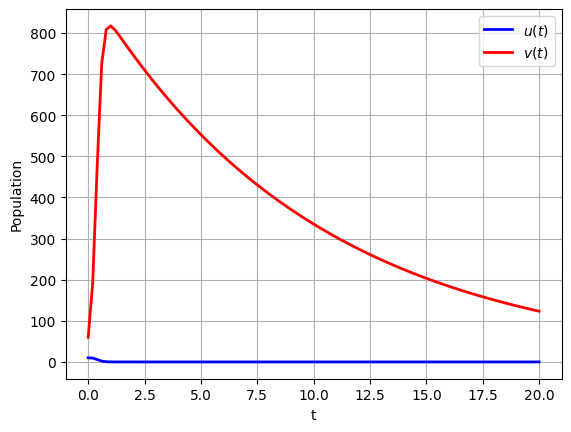

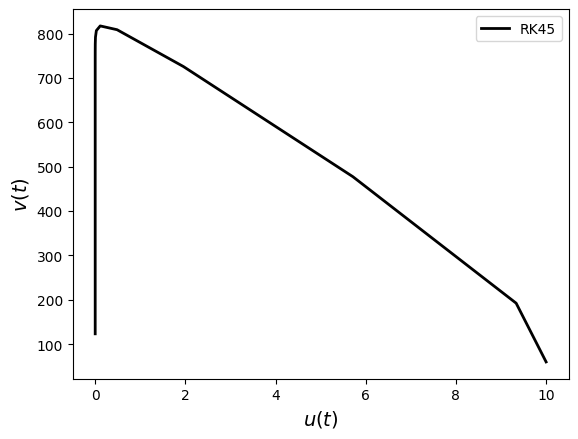

In [ ]:
#here is an example using RK45

def predprey(t,u,params): #define IVP system
  a,b,c,d = params
  u1,v = u
  dudt = a*u1 - b*u1*v
  dvdt = c*u1*v - d*v
  dudt = np.r_[dudt,dvdt].reshape(u.shape)
  return dudt

params = a, b, c, d = [0.8, 0.01, 0.6, 0.1]
u0 = [10,60]
ts = [0,20]
N = 100

tEX,uEX = myivpsolve(predprey,ts,u0,N,params)

plt.plot(tEX,uEX[:,0],'b-',lw=2,label=r'$u(t)$')
plt.plot(tEX,uEX[:,1],'r-',lw=2,label=r'$v(t)$')
plt.xlabel('t')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.figure()
plt.plot(uEX[:,0],uEX[:,1],'k-',lw=2,label=r'RK45')
plt.legend()
plt.ylabel('$v(t)$',fontsize=14); plt.xlabel('$u(t)$',fontsize=14)

**22.6: Python ODE Solvers**

Text(0, 0.5, 'S(t)')

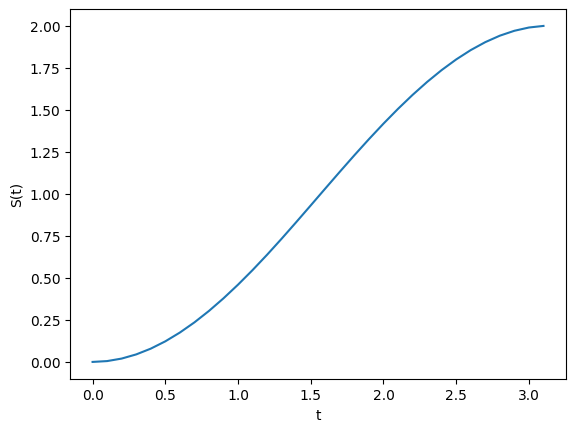

In [ ]:
F = lambda t, s: np.sin(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = scipy.integrate.solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')

Text(0, 0.5, 'S(t)')

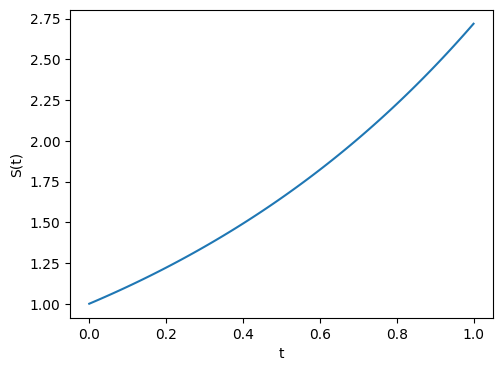

In [ ]:
F = lambda t, s: s

t_eval = np.arange(0, 1.01, 0.01)
sol = scipy.integrate.solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')